# Assignment 2
### Understanding Uncertainty
### Due 9/12

# Name: Erin Siedlecki

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

1 part 1

The most profitable item would be the 'State Bottle Retail' price minus the 'State Bottle Cost' price multiplied by the 'Bottles Sold'. That would provide the profit that the state made on the alcohol sales as it determines the difference in what the state paid versus what they received in sales, and then multiplying that by all the bottle sales they made. The most profitable item would be the item that has the largest number after doing that calculation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1 part 2

iowa = pd.read_csv('data/iowa.csv')
iowa.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [3]:
iowa['Profit (Dollars)'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']

most_profit = ( (iowa.loc[:,['Profit (Dollars)','Item Description']])
               .groupby('Item Description')
               .sum()
               .sort_values(by='Profit (Dollars)', ascending=False))

top_profit = most_profit[:20].copy()
top_profit

,Profit (Dollars)
Item Description,
TITOS HANDMADE VODKA,364074.35
BLACK VELVET,274676.85
FIREBALL CINNAMON WHISKEY,187535.22
CROWN ROYAL,160981.95
CROWN ROYAL REGAL APPLE,122880.40
CAPTAIN MORGAN SPICED RUM,121115.30
HAWKEYE VODKA,116375.04
CAPTAIN MORGAN ORIGINAL SPICED,112146.71
JACK DANIELS OLD #7 BLACK LABEL,111509.09


<Axes: xlabel='Profit (Dollars)', ylabel='Item Description'>

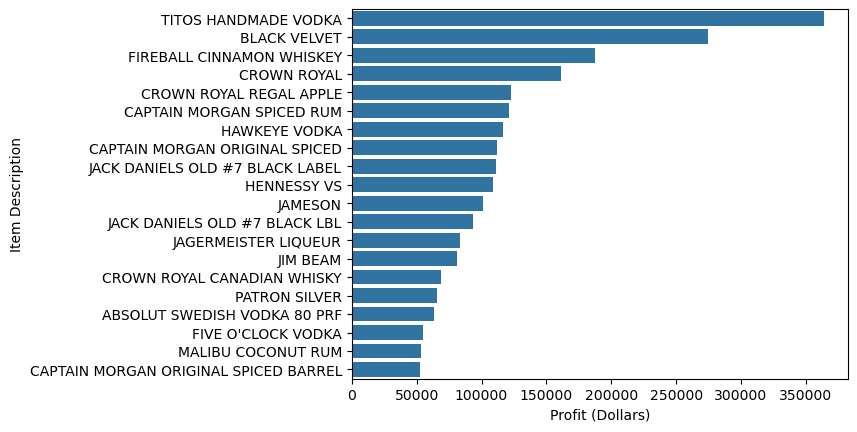

In [4]:
# 1 part 3

sns.barplot(top_profit['Profit (Dollars)'], orient='h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [5]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [6]:
# 2 part 1

x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When you try to subtract x and y, you receive an error message stating "ValueError: operands could not be broadcast together with shapes (3,) (2,)".

In [7]:
# 2 part 2

x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

When you do this, you get a 3x2 matrix that shows the output of subtracting each value of y from the first value of x (1) in the top row of the matrix. Then it shows the output of subtracting each value of y from the second value of x (3) in the second row of the matrix, and so on and so forth.

In [8]:
# 2 part 3

x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

When you do this, you get a 2x3 matrix that shows the output of subtracting the first value of y (2) from each value of x in the top row of the matrix. Then it shows the output of subtracting the second value of y (5) from each value of x in the second row of the matrix.

In [9]:
# 2 part 4

for i_x in range(len(x)):
    result = []
    for i_y in range(len(y)):
        result.append(int(x[i_x] - y[i_y]))
    print(result)
        

[-1, -4]
[1, -2]
[3, 0]


In [10]:
for i_x in range(len(y)):
    result = []
    for i_y in range(len(x)):
        result.append(int(x[i_y] - y[i_x]))
    print(result)

[-1, 1, 3]
[-4, -2, 0]


In [11]:
# 2 part 5

x.reshape(1,-1)

array([[1, 3, 5]])

In [12]:
x.reshape(-1,1)

array([[1],
       [3],
       [5]])

2 part 5

The reshape function is used to alter shape. "x.reshape(1,-1)" returns a horitonzal array, and "x.reshape(-1,1)" returns a vertical array. The reshaping alters the number of rows and columns , so "x.reshape(1,-1)" returns a 1x3 matrix, and "x.reshape(-1,1)" returns a 3x1 matrix.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

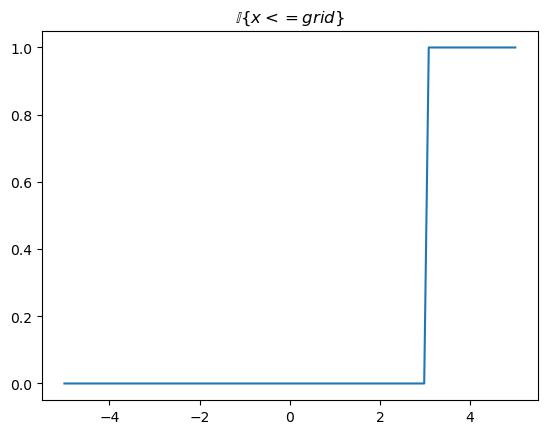

In [13]:
# 3 part 1

grid = np.linspace(-5,5,100)
def indicator_func(x, grid):
    return (x <= grid).astype(int)

def indicator_func2(x, grid):
    return (x > grid).astype(int)

sns.lineplot(y=indicator_func(3,grid), x=grid).set(title='$ \\mathbb{I}\\{x <= grid\\}$')
plt.show()

3 part 2

$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

When you multiply the definition shown above by -1, you get the following: 
$$
-\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
-1, &x \le z
\end{cases}
$$

Then, if you add 1, you get the following:
$$
1-\mathbb{I}\{x \le z\} = \begin{cases}
1+0, &x > z \\
1-1, &x \le z
\end{cases}
$$

That then simplifies to the following:
$$
1-\mathbb{I}\{x \le z\} = \begin{cases}
1, &x > z \\
0, &x \le z
\end{cases}
$$

From this we can determine that the left side equals 1 - 0 = 1, and therefore we get $\mathbb{I}\{ x > z \}$.

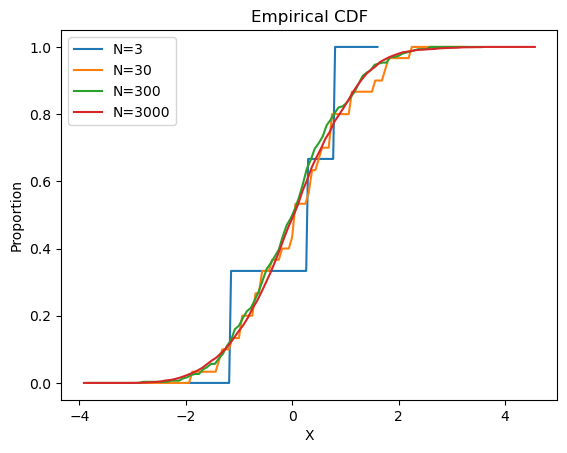

In [14]:
# 3 part 3

import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
        X = rng.normal(0,1,N)
        grid2 = np.linspace(X.min()-X.std(), X.max()+X.std(), 100)
        ecdf = 0*grid2.copy()
        X = np.sort(X)
        for i in X:
                ecdf += (i <= grid2).astype(int)
        ecdf2 = ecdf/len(X)
        plt.plot(grid2, ecdf2, label=f'N={N}')
        plt.title('Empirical CDF')
        plt.ylabel('Proportion')
        plt.xlabel('X')
        plt.legend()       

3 part 4

When the sample size N increases, the ECDF is much smoother and more closely resembles the true CDF curve.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [15]:
# 4 part 1

def quantile_func(data,q):
    data_asc = np.sort(data)
    i = q * (len(data_asc)-1)
    down = int(i)
    up = down + 1
    between = i - down
    if up >= len(data_asc):
        return data_asc[down]
    return data_asc[down] + between * (data_asc[up] - data_asc[down])

In [16]:
# 4 part 2

def iqr_func(data):
    data_asc = np.sort(data)
    q1 = quantile_func(data_asc, 0.25)
    q3 = quantile_func(data_asc, 0.75)
    iqr = q3 - q1
    whisker1 =  q1 - 1.5 * iqr
    whisker2 =  q3 + 1.5 * iqr
    return print('Whisker 1:', whisker1, '0.25 Quantile:', q1, 'IQR:', iqr, '0.75 Quantile:', q3,'Whisker 2:', whisker2)

In [17]:
# 4 part 3

def numsum5(data):
    data_asc = np.sort(data)
    min = data_asc[0]
    q1 = quantile_func(data_asc, 0.25)
    median = quantile_func(data_asc, 0.5)
    q3 = quantile_func(data_asc, 0.75)
    max = data_asc[-1]
    iqr = q3 - q1
    whisker1 = q1 - 1.5 * iqr
    whisker2 = q3 + 1.5 * iqr
    return print('Min:', min, '0.25 Quantile:', q1, 'Median:', median, "0.75 Quantile:", q3, 'Max:', max,'Whisker 1:', 
                 whisker1, 'Whisker 2:', whisker2)

In [18]:
# 4 part 4

def is_outlier(data):
    data_asc = np.sort(data)
    q1 = quantile_func(data_asc, 0.25)
    q3 = quantile_func(data_asc, 0.75)
    iqr = q3 - q1
    whisker1 = q1 - 1.5 * iqr
    whisker2 = q3 + 1.5 * iqr
    outliers = [x < whisker1 or x > whisker2 for x in data_asc]
    return outliers

In [19]:
# 4 part 5

df = iowa['Bottles Sold']
print(quantile_func(df,0.25), quantile_func(df,0.75))

3.0 12.0


In [20]:
iqr_func(df)

Whisker 1: -10.5 0.25 Quantile: 3.0 IQR: 9.0 0.75 Quantile: 12.0 Whisker 2: 25.5


In [21]:
numsum5(df)

Min: -60 0.25 Quantile: 3.0 Median: 6.0 0.75 Quantile: 12.0 Max: 2400 Whisker 1: -10.5 Whisker 2: 25.5


In [22]:
is_outlier(df)

[np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,

In [23]:
df.describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

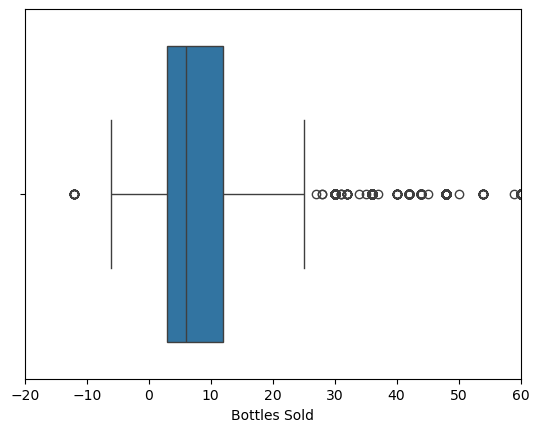

In [24]:
sns.boxplot(df, orient='h')
plt.xlim(-20,60)
plt.show()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?